In [25]:
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [69]:
import pygimli as pg
from pygimli import meshtools as mt
from pygimli.viewer import showMesh # explore docstrings better than pg.show

In [70]:
world = mt.createWorld(start=[-20, 0], end=[20, -16])
print(world)

Mesh: Nodes: 4 Cells: 0 Boundaries: 4


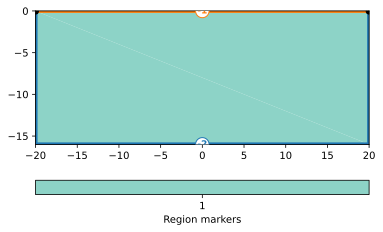

In [71]:
#pg.show(world); # actually this is a shortcut to showMesh
showMesh(world,
       boundaryMarkers=True
       );

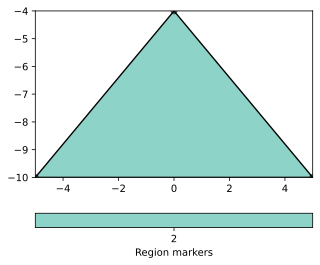

In [72]:
body = mt.createPolygon([[-5, -10],[5, -10], [0, -4]], 
                        isClosed=True, marker=2,
                        #addNodes=4,
                        #interpolate='spline', 
                        )
pg.show(body, showNodes=True);

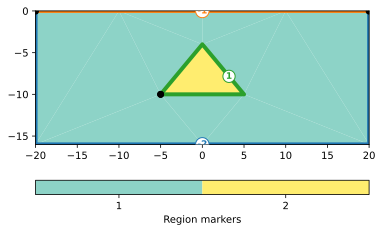

In [73]:
geom = world + body
pg.show(geom, boundaryMarkers=True);

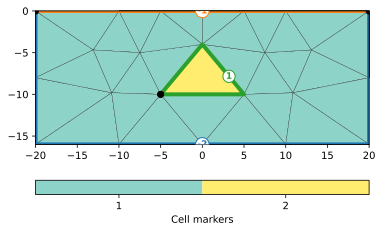

In [74]:
mesh = mt.createMesh(geom, 
                     #area=1.0, 
                     #smooth=[2, 4]
                    )
showMesh(mesh, markers=True, showMesh=True);

Now we solve the heat equation
$$ \nabla (a \cdot \nabla T) = f $$

In [75]:
T = pg.solver.solve(mesh,
                    a=[[1, 1.0], [2, 20.0]],
                    bc={'Dirichlet':{-1:1.0, -2:0.0}},
                    verbose=True)

Mesh:  Mesh: Nodes: 23 Cells: 30 Boundaries: 52
Assembling time:  0.002
Solving time:  0.0


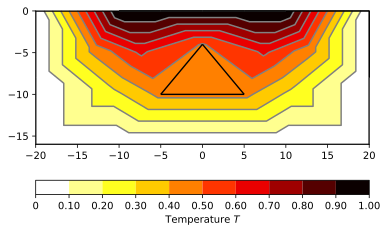

In [76]:
ax, _ = showMesh(mesh, data=T, label='Temperature $T$', cMap="hot_r",
                 nLevs=11, showBoundary=True);